In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpig

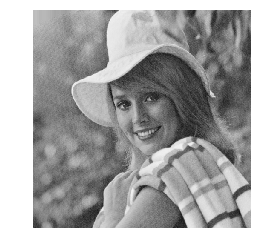

In [3]:
image_in = plt.imread('./1-512.jpg')
plt.imshow(image_in)
plt.axis('off')
plt.show()

In [10]:
def bilinear_interpolation(image_in, frac):
    m, n, f = image_in.shape
    w, h = int(m*frac), int(n*frac)
    
    image_out = np.zeros((w, h, f),  dtype = 'uint8')
    for i in range(w-1):
        for j in range(h-1):
            r_out = i / frac
            c_out = j / frac

            int_r = int(np.floor(r_out))
            int_c = int(np.floor(c_out))

            delta_r = r_out - int_r
            delta_c = c_out - int_c

            int_r = max(min(m-2, int_r), 0) 
            int_c = max(min(n-2, int_c), 0) 

            for k in range(f):
                image_out[i, j, k] = image_in[int_r, int_c, k] * (1-delta_r)*(1-delta_c) + \
                    image_in[int_r + 1, int_c, k] * delta_r * (1 - delta_c) + \
                    image_in[int_r, int_c + 1, k] * (1 - delta_r) * delta_c + \
                    image_in[int_r + 1, int_c + 1, k] * delta_r * delta_c
        
    return image_out

In [16]:
def nearest_neighbor(image_in, frac):
    m, n, f = image_in.shape
    w, h = int(m*frac), int(n*frac)
    
    image_out = np.zeros((w, h, f),  dtype = 'uint8')
    
    for i in range(w):
        for j in range(h):
            r_out = i / frac
            c_out = j / frac

            int_r = int(np.floor(r_out))
            int_c = int(np.floor(c_out))

            int_r = max(min(m-1, int_r), 0) 
            int_c = max(min(n-1, int_c), 0) 

            for k in range(f):
                image_out[i, j, k] = image_in[int_r, int_c, k]
        
    return image_out
   

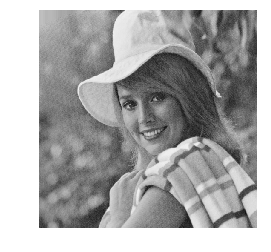

In [19]:
near_out = nearest_neighbor(image_in, 2)

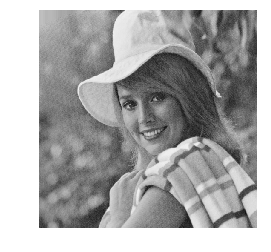

In [21]:
plt.imshow(near_out)
plt.axis('off')
plt.show()


In [ ]:
bilinear_out = bilinear_interpolation(image_in, 2)

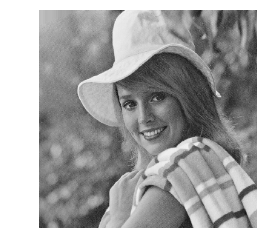

In [12]:
plt.imshow(bilinear_out)
plt.axis('off')
plt.show()
